<a href="https://colab.research.google.com/github/donaldRwilliams/notebook/blob/main/notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

For this prediction taks, I will use the following libraries:

In [59]:
# l1-regularization
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
import statsmodels.api as sm
import numpy as np
import pandas as pd
import os


This step is not required, but side-steps writing out the full name for the `.xlsx` files.

In [270]:
# long file name. use location in directory.
files_in_directory = os.listdir("notebook/")

files_in_directory

['.git',
 'recruiting_zeta-disease_training-data_take-home-challenge.xlsx',
 'README.md',
 'recruiting_zeta-disease_prediction-data_take-home-challenge.xlsx',
 '.ipynb_checkpoints']

With the location in the `listdir` in hand, I now import the training and test datasets, after which I being exploring the data by checking the `shape` of 
the datasets

In [300]:
training_data = pd.read_excel("notebook/" + files_in_directory[1])
test_data = pd.read_excel("notebook/" + files_in_directory[3])

test_data.shape

print("Features: " + str(training_data.shape[1] - 1), 
      "\nRows [test data]: " + str(test_data.shape[0]),
      "\nRows [training data]: " + str(training_data.shape[0]))

Features: 8 
Rows [test data]: 20 
Rows [training data]: 800


In [173]:

X_train = training_data.drop(columns= "zeta_disease")
X_test = test_data.drop(columns= "zeta_disease")
y_test  = test_data[["zeta_disease"]]
y_train = training_data[["zeta_disease"]]

coef_n = X_train.shape[1]

t = np.transpose


def LassoCV_logistic(X=None, y=None, 
                     alpha_min=0.0001, 
                     alpha_max = 1, 
                     alpha_n = 100, 
                     cv_folds = 5, 
                     scoring = "f1_micro"):
  
  
  alpha = np.linspace(start=alpha_min, stop=alpha_max, num=alpha_n)
  cv_scores = np.empty([cv_folds, alpha_n])
  
  solution_path = pd.DataFrame()
  cv_scores = pd.DataFrame()
  
  coef_n = X_train.shape[1]
  coef_id = pd.DataFrame(np.linspace(1, coef_n, coef_n)[:,], columns = ["coef_id"])
  for a in range(0, alpha_n):
    
    setup = LogisticRegression(penalty='l1', C= alpha[a], solver='liblinear', class_weight="balanced")
    
    fit_a = setup.fit(X_train, np.ravel( y_train))
    
    coef = t(pd.DataFrame(fit_a.coef_, index=["coef"]))
   
    alpha_a = pd.DataFrame(np.repeat(alpha[a], coef_n)[:,], columns = ["alpha_a"])

    solution_path = solution_path.append(pd.concat([coef_id, coef, alpha_a], axis =1))

    cv_scores = cv_scores.append(pd.DataFrame(cross_val_score(setup, X_train, np.ravel(y_train), cv=cv_folds, scoring=scoring)))
  return solution_path


fits = LassoCV_logistic(X_train, y_train, alpha_n = 100, cv_folds = 3, alpha_max = 0.2)

fits

In [ ]:
clf = LogisticRegression(penalty='l1', C= 0.0001, solver='liblinear', class_weight="balanced")

fit_a = clf.fit(X_train, np.ravel( y_train))

fit_a.coef_

coef = t(pd.DataFrame(fit_a.coef_, index=["coef"]))
coef_id = pd.DataFrame(np.linspace(1, 8, 8)[:,], columns = ["coef_id"])
alpha_a = pd.DataFrame(np.repeat(1, 8)[:,], columns = ["alpha_a"])

pd.concat([coef_id, coef, alpha_a], axis =1)





array([[0., 0., 0., 0., 0., 0., 0., 0.]])

In [269]:
from statsmodels.base.l1_slsqp import fit_l1_slsqp
solution_path = pd.DataFrame()
cv_scores = pd.DataFrame()

coef_id = pd.DataFrame(np.linspace(1, coef_n, coef_n)[:,], columns = ["coef_id"])

clf = LogisticRegression(penalty='l1', C = 0.1, solver='liblinear')
    
fit_a = clf.fit(X_train_scaled, np.ravel( y_train))
pd.DataFrame( fit_a.coef_)

np.sum(np.square (  pd.DataFrame(fit_a.predict(X_train_scaled)).iloc[:,0] - y_train.iloc[:,0]))



coef = t(pd.DataFrame(fit_a.coef_, index=["coef"]))
   
alpha_a = pd.DataFrame(np.repeat(0.1, 8)[:,], columns = ["alpha_a"])

solution_path = solution_path.append(pd.concat([coef_id, coef, alpha_a], axis =1))

cv_scores = cv_scores.append(pd.DataFrame(cross_val_score(clf, X_train_scaled, np.ravel(y_train), cv=10, scoring="f1_micro")))

cv_scores

,0
0,0.7375
1,0.7375
2,0.8000
3,0.7000
4,0.8000
5,0.8250
6,0.7250
7,0.7375
8,0.8125
9,0.7375


In [140]:
center_function = lambda x: x - x.mean()

df_centered = X_train.apply(lambda x: x-x.mean())
logreg = LogisticRegression()
fit = logreg.fit(df_centered, np.ravel(y_train))

pd.DataFrame( fit.coef_)

model = sm.Logit(y_train, df_centered)

res = model.fit()

res.params



def scale(X):
  means = X_train.mean()
  stds  = X_train.std()
  X_scaled = (X_train - means) / stds
  return ['means' = mean]

temp.mean()

SyntaxError: ignored

[Text(0, 0.5, 'Coefficient Size'), Text(0.5, 0, 'Regularization Parameter')]

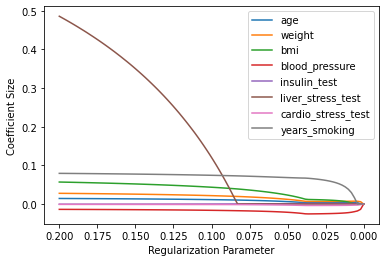

In [ ]:
import seaborn as sns

fits['coef_id'] = fits.coef_id.astype(str)

fits = fits.reset_index()

plt = sns.lineplot(x='alpha_a', 
             hue = 'coef_id',
             y='coef',
             data=fits , legend= False)

plt.invert_xaxis()

plt.legend(title='', loc='upper right', labels=X_train.columns)

plt.set(ylabel='Coefficient Size', xlabel='Regularization Parameter')

Index(['age', 'weight', 'bmi', 'blood_pressure', 'insulin_test',
       'liver_stress_test', 'cardio_stress_test', 'years_smoking'],
      dtype='object')

In [ ]:
from sklearn.model_selection import cross_val_score

X_train

,age,weight,bmi,blood_pressure,insulin_test,liver_stress_test,cardio_stress_test,years_smoking
0,54.0,189.0,27.1,80.0,0.0,1.5038,0.0,10.0
1,23.0,150.0,38.5,68.0,71.0,0.3868,55.0,2.0
2,47.0,186.0,29.9,90.0,0.0,0.2728,0.0,7.0
3,18.0,150.0,30.8,70.0,1033.0,0.6598,56.0,0.0
4,24.0,160.0,32.4,74.0,125.0,0.7608,59.0,2.0
...,...,...,...,...,...,...,...,...
795,26.0,161.0,28.4,90.0,78.0,0.5578,42.0,3.0
796,37.0,165.0,33.7,60.0,0.0,0.3078,69.0,6.0
797,27.0,166.0,25.6,74.0,0.0,0.2638,0.0,5.0
798,109.0,139.0,28.1,66.0,94.0,0.2298,53.0,1.0


In [162]:
def scale(X):
  means = X_train.mean()
  stds  = X_train.std()
  X_scaled = (X_train - means) / stds
  return {"X_scaled": X_scaled, "stds": stds, "means": means}

In [199]:
scaling_info = scale(X_train)


X_train_scaled = scaling_info["X_scaled"]
X_test_scaled = (X_test - scaling_info["means"]) / scaling_info["stds"]

xog = sm.add_constant(X_train_scaled)
model = sm.Logit(y_train, xog)

res = model.fit()

res.predict()

res.summary()


array([0.75151449, 0.17614   , 0.40551455, 0.03945275, 0.19615176,
       0.14793757, 0.09269199, 0.21316662, 0.14060158, 0.52028894,
       0.31429059, 0.30523859, 0.11661095, 0.36217882, 0.41049693,
       0.27419307, 0.19010194, 0.62606583, 0.04948227, 0.07040968,
       0.07633516, 0.14717532, 0.02537845, 0.58757062, 0.76987501,
       0.24934386, 0.33824001, 0.13095605, 0.70903431, 0.61242973,
       0.81596791, 0.79652461, 0.86527791, 0.16672021, 0.14039981,
       0.11168682, 0.22005424, 0.11320009, 0.37759229, 0.09291453,
       0.08000321, 0.75163468, 0.51123508, 0.78270848, 0.27489816,
       0.15084816, 0.15668833, 0.40980641, 0.44424051, 0.42943359,
       0.34777322, 0.7187347 , 0.17094877, 0.09680816, 0.45320051,
       0.15812815, 0.20508036, 0.17270237, 0.10882911, 0.31012884,
       0.31542931, 0.62102773, 0.17983898, 0.95629369, 0.17124443,
       0.70038116, 0.31758448, 0.33241855, 0.56024612, 0.09219447,
       0.89345077, 0.30208654, 0.33446978, 0.12128236, 0.50348